In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df21 = pd.read_csv('analyze_fourGu_21.csv')
df22 = pd.read_csv('analyze_fourGu_22.csv')

In [3]:
df21['2021'] = df21['인접_상가수']
df22['2022'] = df22['인접_상가수']

In [6]:
shop = pd.concat([df21['2021'],df22['2022']],join='outer',axis=1)
shop = pd.concat([df21.set_index('매장명')['2021'], df22.set_index('매장명')['2022']], axis=1,join='outer')

In [8]:
shop.reset_index(inplace= True)
shop.fillna(0,inplace= True)

In [10]:
shop.melt(id_vars='매장명',value_vars=['2021','2022'],var_name='년도')

,매장명,년도,value
0,대구영대병원역DT,2021,237.0
1,대구앞산DT,2021,152.0
2,대구가톨릭대학교병원,2021,161.0
3,대구평리DT,2021,297.0
4,신세계대구3F(티바나),2021,361.0
5,신세계대구8FR,2021,359.0
6,동대구로DT,2021,299.0
7,대구팔공산,2021,19.0
8,대구봉무,2021,513.0
9,동대구터미널,2021,394.0


In [11]:
import seaborn as sns

In [12]:
from matplotlib import font_manager, rc
font_path = r'C:\Users\LG\Desktop\exam_pandas\Day_07'+'\malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

### 년도 비교

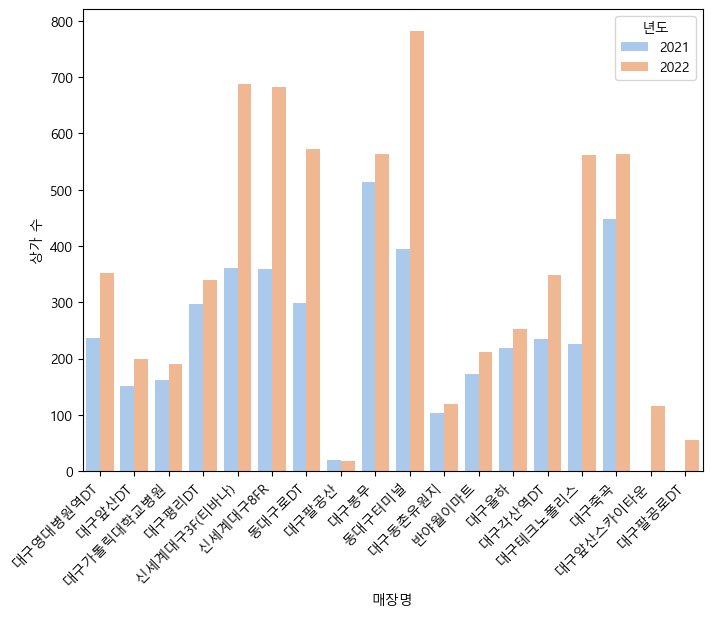

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='매장명',y = 'value',hue='년도',data = shop.melt(id_vars='매장명',var_name='년도'),palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('매장명')
plt.ylabel('상가 수')

plt.show()

In [14]:
df21.하루평균유동인구_대중교통.mean()

8472.196875

In [17]:
import numpy as np

In [21]:
dague22 = pd.read_csv('analyze_Daegu_22.csv')
dague22

,매장명,위도,경도,인접_상가수,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
0,계명대동산병원,35.853811,128.480276,144,3,1,11012.89,4,66.76,11079.66
1,대구죽전역,35.848437,128.536007,363,7,1,10226.65,4,72.58,10299.23
2,대구월곡DT,35.814866,128.541057,202,13,0,0.00,5,83.21,0.00
3,대구광장,35.855770,128.552811,588,12,1,12130.89,4,128.23,12259.12
4,대구월촌역,35.824025,128.545226,265,14,1,7586.71,5,35.01,7621.72
...,...,...,...,...,...,...,...,...,...,...
74,수성레이크,35.825764,128.621814,203,5,0,0.00,4,60.64,60.64
75,대구범어제니스,35.859274,128.629687,203,6,1,13055.82,2,306.88,13362.70
76,대구두산DT,35.827283,128.625849,307,7,0,0.00,5,74.50,74.50
77,대구들안길DT,35.837524,128.616360,224,6,0,0.00,4,68.59,68.59


In [25]:
median_ = dague22['하루평균유동인구_대중교통'].median()
median_

In [59]:
mean_ = dague22['하루평균유동인구_대중교통'].mean()
mean_

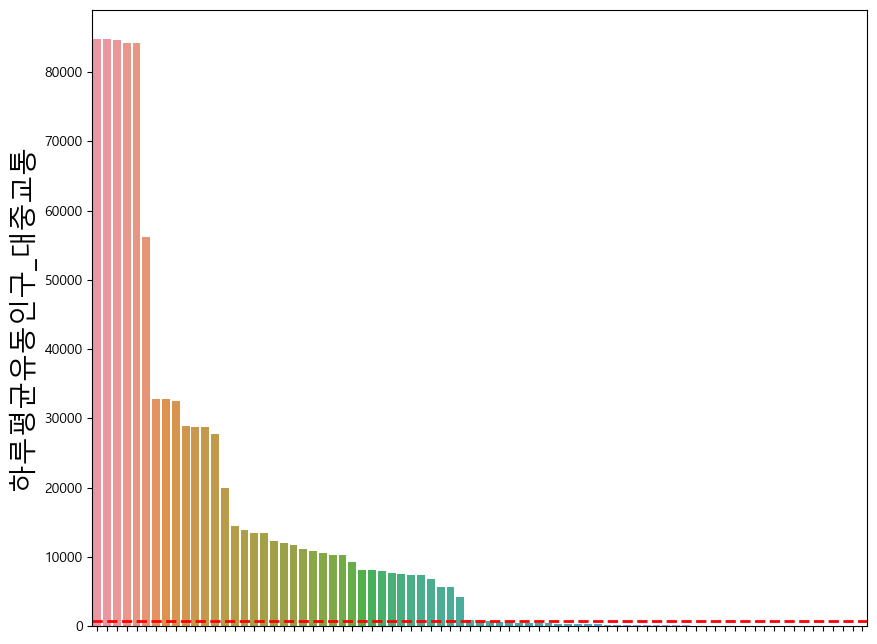

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='매장명',y='하루평균유동인구_대중교통',data= dague22)
plt.ylabel('하루평균유동인구_대중교통',fontsize=20)
plt.axhline(dague22['하루평균유동인구_대중교통'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')

plt.gca().set_xticklabels([])
plt.gca().set_xlabel('')

plt.savefig('유동인구중앙값상한선.jpg',bbox_inches='tight')
plt.show()

In [31]:
dague22[dague22['하루평균유동인구_대중교통'] <= median_]

,매장명,위도,경도,인접_상가수,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통,로그변환_하루평균유동인구
55,대구복현DT,35.896764,128.614642,409,12,0,0.0,7,782.54,782.54,6.662545
69,대구시지,35.839493,128.708043,561,11,0,0.0,5,654.42,654.42,6.483749
23,대구평리DT,35.866138,128.555343,339,13,0,0.0,4,548.65,548.65,6.307461
54,경북대,35.892320,128.608586,445,4,0,0.0,4,545.61,545.61,6.301904
70,대구만촌DT,35.856431,128.650200,268,8,0,0.0,5,500.89,500.89,6.216387
53,대구칠곡,35.942179,128.563879,568,11,0,0.0,9,437.02,437.02,6.079979
58,대구수성도서관DT,35.873059,128.638985,371,5,0,0.0,7,400.85,400.85,5.993587
56,대구칠성이마트,35.885073,128.589755,204,10,0,0.0,4,369.92,369.92,5.913287
78,대구만촌이마트,35.871123,128.637214,223,5,0,0.0,5,326.95,326.95,5.789807
65,대구중동네거리DT,35.840917,128.613963,247,6,0,0.0,8,296.81,296.81,5.693092


In [33]:
len(dague22[dague22['하루평균유동인구_대중교통'] <= median_])

40

In [51]:
dague22.sort_values('인접_상가수',ascending=False,inplace=True)

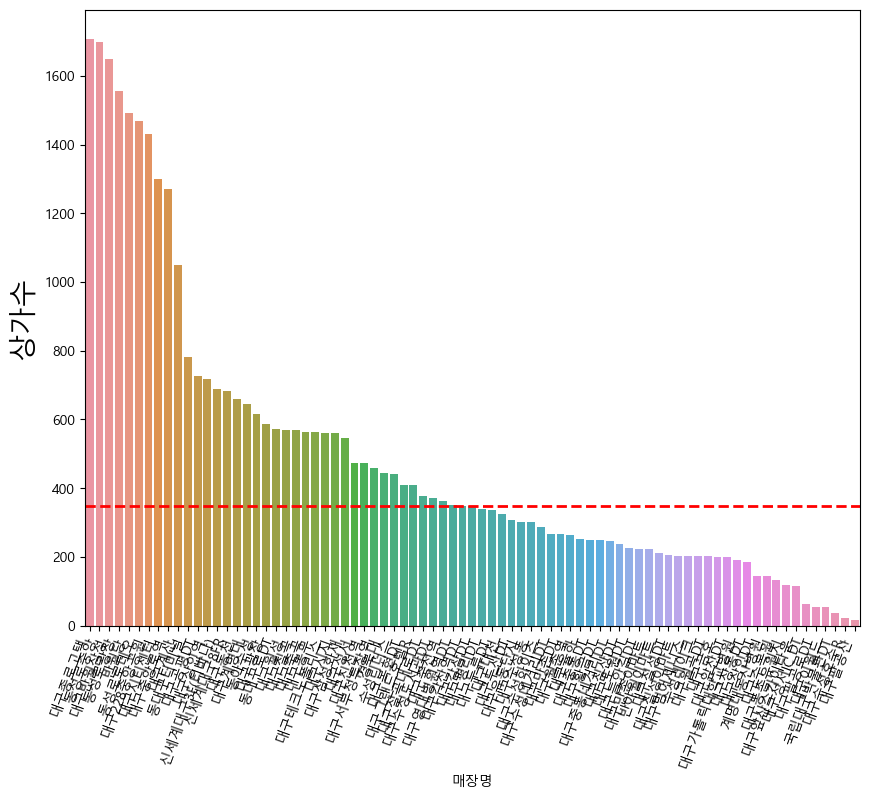

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x='매장명',y='인접_상가수',data= dague22)
plt.ylabel('상가수',fontsize=20)
plt.axhline(347, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.xticks(ha='right',rotation=70)


plt.show()

In [57]:
dague22.sort_values('인접_학교수',ascending=False,inplace=True)

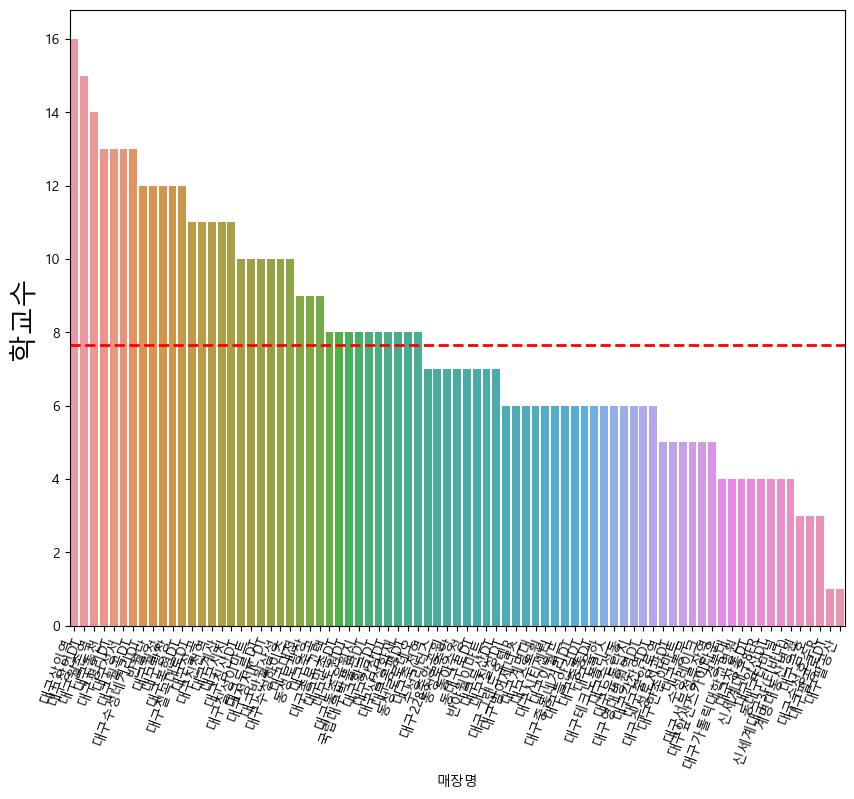

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='매장명',y='인접_학교수',data= dague22)
plt.ylabel('학교수',fontsize=20)
plt.axhline(dague22['인접_학교수'].mean(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.xticks(ha='right',rotation=70)


plt.show()

평균이 너무 큰값에 영향을 받으므로 대표값을 중앙값으로 선택